# Importing necessary libraries

In [78]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

## Initializing the quantum circuit

In [79]:
qr = QuantumRegister(3)
cr = ClassicalRegister(2)

In [80]:
circuit = QuantumCircuit(qr, cr)

## How to visualize the circuit?

We can use different methods depending on our requirements. A quick print statement is a quick-and-dirty solution. Then $\texttt{matploblib}$ and even $\texttt{latex}$ figures give you high quality outputs worthy of even scientific journals!

In [81]:
print(circuit)

      
q5_0: 
      
q5_1: 
      
q5_2: 
      
c4: 2/
      


In [82]:
circuit.draw()

q5_0: 
      
q5_1: 
      
q5_2: 
      
c4: 2/

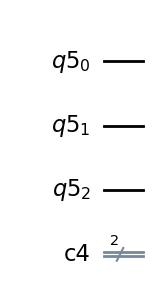

In [83]:
circuit.draw(output='mpl')

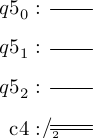

In [84]:
circuit.draw(output='latex')

Let's add some actual gates to the circuit

In [85]:
circuit.u(1, 1.2, -0.33, 0)
# circuit.h(0)

circuit.h(1)
circuit.cx(1, 2)

circuit.barrier() # useful for visualizing the circuit as "blocks". Might change the transpilation, though!

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q5'), 0), Qubit(QuantumRegister(3, 'q5'), 1), Qubit(QuantumRegister(3, 'q5'), 2)), clbits=())

In [86]:
circuit.cx(0, 1)
circuit.h(0)

circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q5'), 0), Qubit(QuantumRegister(3, 'q5'), 1), Qubit(QuantumRegister(3, 'q5'), 2)), clbits=())

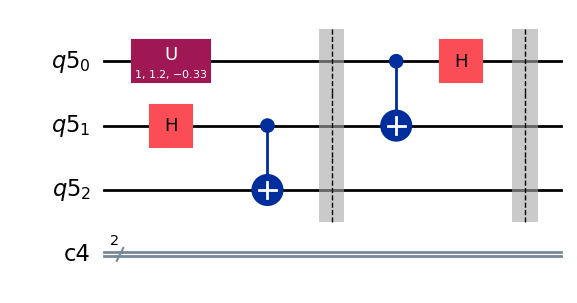

In [87]:
circuit.draw(output='mpl')

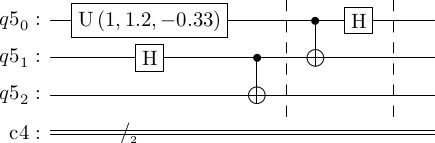

In [88]:
circuit.draw(output='latex')

Let's now perform a measurement of a subset of the qubits.

In [89]:
circuit.measure(0, 0)
circuit.measure(1, 1)

In [90]:
# circuit.reset([0, 1])

In [91]:
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q5'), 0), Qubit(QuantumRegister(3, 'q5'), 1), Qubit(QuantumRegister(3, 'q5'), 2)), clbits=())

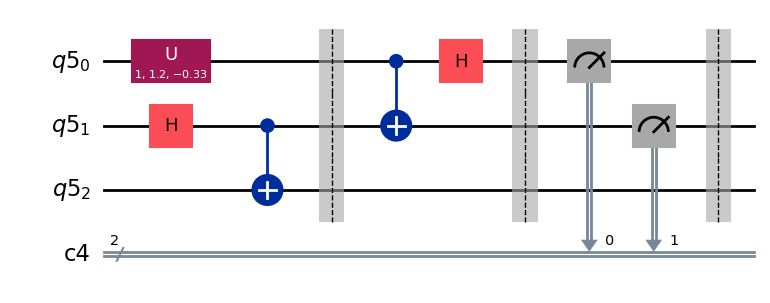

In [92]:
circuit.draw(output='mpl')

Now we can perform gates conditioned on the measurement outcomes!

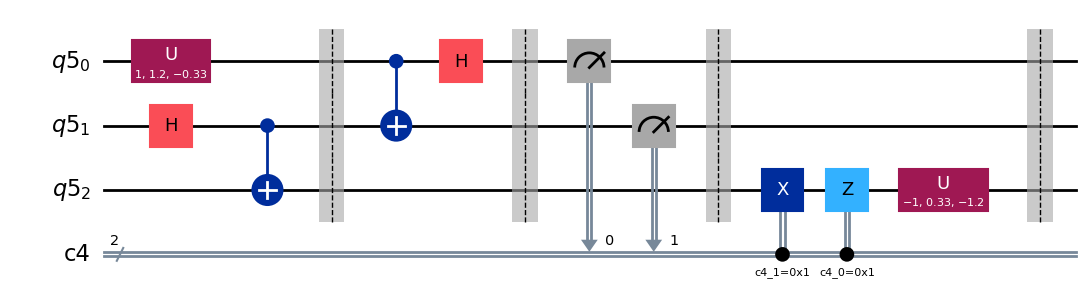

In [93]:
circuit.x(2).c_if(1, 1)
circuit.z(2).c_if(0, 1)

circuit.u(-1, 0.33, -1.2, 2)
# circuit.h(2)

circuit.barrier()

circuit.draw(output='mpl')

Finally, let's measure the entire circuit and look at the statistics!

In [94]:
circuit.measure_all()

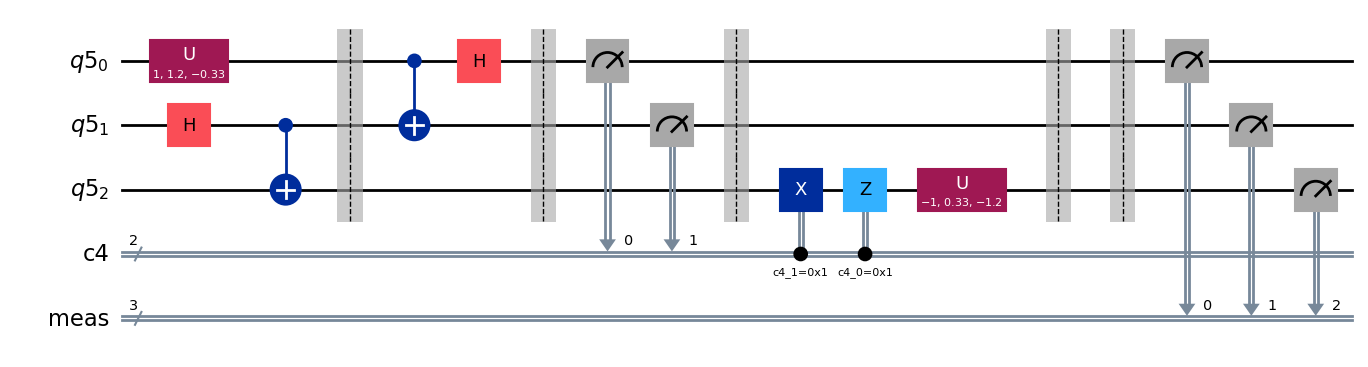

In [95]:
circuit.draw(output='mpl')

We need to simulate the circuit in order to see how it works.

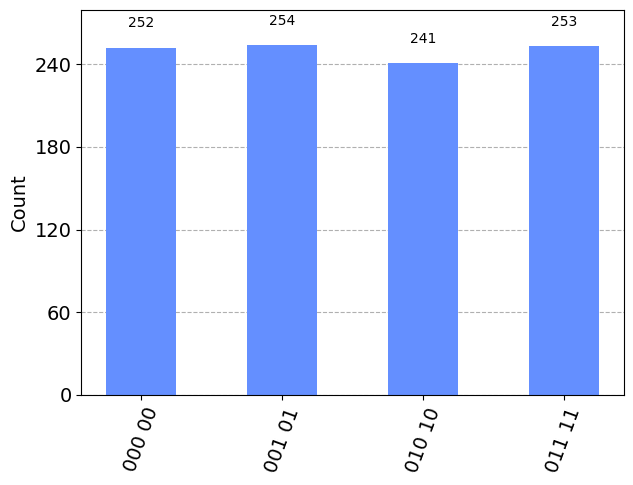

In [96]:
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('aer_simulator')

job = backend.run(circuit, shots=1000)

result = job.result()

counts = result.get_counts(circuit)
plot_histogram(counts)